In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_dir = "drive/MyDrive/ml_engineering/data/A_Z Handwritten Data.csv"

Mounted at /content/drive


## Load Dataset

In [ ]:
dataset = pd.read_csv(file_dir).astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

X = dataset.drop('label',axis = 1)
y = dataset['label']

## Split Dataset

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_valid = standard_scaler.transform(X_valid)
X_test = standard_scaler.transform(X_test)

## Preprocess Dataset

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')


y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [ ]:

print("\n".join([", ".join([str(1 if value > .5 else 0) for value in row]) for row in X_train[1].reshape(28,28)]))

index = np.argmax(np.argmax(y_train[1], axis=1))
labels = [
   "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T" , "U", "V", "W", "X", "Y", "Z"
]

print(labels[index])


0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0

## Create Model

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
model = Sequential([
    Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(y.unique()), activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                        

## Train Model

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
checkpoint = ModelCheckpoint(filepath="./checkpoint.weights.h5",save_weights_only=True, monitor='val_loss', mode='min',save_best_only=True)

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=18, batch_size=200, verbose=2, callbacks=[early_stopping, checkpoint])

Epoch 1/18
1304/1304 - 18s - loss: 0.2317 - accuracy: 0.9352 - val_loss: 0.0942 - val_accuracy: 0.9737 - 18s/epoch - 14ms/step
Epoch 2/18
1304/1304 - 6s - loss: 0.0893 - accuracy: 0.9747 - val_loss: 0.0631 - val_accuracy: 0.9826 - 6s/epoch - 5ms/step
Epoch 3/18
1304/1304 - 7s - loss: 0.0664 - accuracy: 0.9808 - val_loss: 0.0584 - val_accuracy: 0.9839 - 7s/epoch - 5ms/step
Epoch 4/18
1304/1304 - 8s - loss: 0.0540 - accuracy: 0.9841 - val_loss: 0.0488 - val_accuracy: 0.9865 - 8s/epoch - 6ms/step
Epoch 5/18
1304/1304 - 6s - loss: 0.0448 - accuracy: 0.9864 - val_loss: 0.0452 - val_accuracy: 0.9881 - 6s/epoch - 5ms/step
Epoch 6/18
1304/1304 - 7s - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0405 - val_accuracy: 0.9895 - 7s/epoch - 5ms/step
Epoch 7/18
1304/1304 - 6s - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0385 - val_accuracy: 0.9897 - 6s/epoch - 4ms/step
Epoch 8/18
1304/1304 - 10s - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0401 - val_accuracy: 0.9901 - 10s/epoch - 8ms/step
Epo

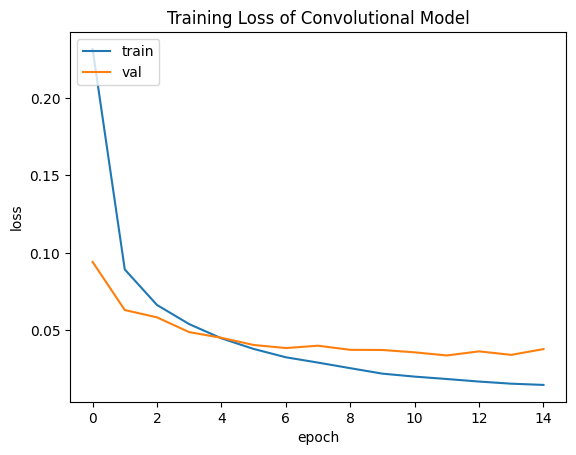

In [ ]:
import matplotlib.pyplot as plt
def display_training_history(history, title):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
display_training_history(history, "Training Loss of Convolutional Model")

## Evaluate Model

In [ ]:
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

InvalidArgumentError: ignored

## Save Model

In [ ]:
model.save("letter_recognizer.h5", save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
